### **Previsão se o Cliente irá entrar em Default**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
arquivo = 'default.csv'
colunas = ['Escore_Serasa', 'Escore_CCF', 'Atraso_30D', 'Saldo_cc_ULT_3M',
           'Proven_sobre_Endiv', 'Endiv_SFN', 'Expos_CHESP', 'Expos_CRD', 'Default']

dados = pd.read_csv( arquivo, names=colunas)
dados.head()

,Escore_Serasa,Escore_CCF,Atraso_30D,Saldo_cc_ULT_3M,Proventos_Endiv,Endiv_SFN,Expos_CHESP,Expos_CRD,Default
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Avaliando a Variável Target

In [4]:
dados['Default'].value_counts()

Default
0    500
1    268
Name: count, dtype: int64

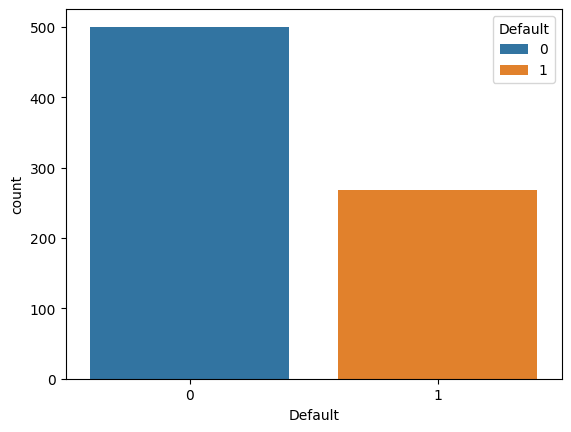

In [9]:
sns.countplot(data = dados, x='Default', hue='Default');

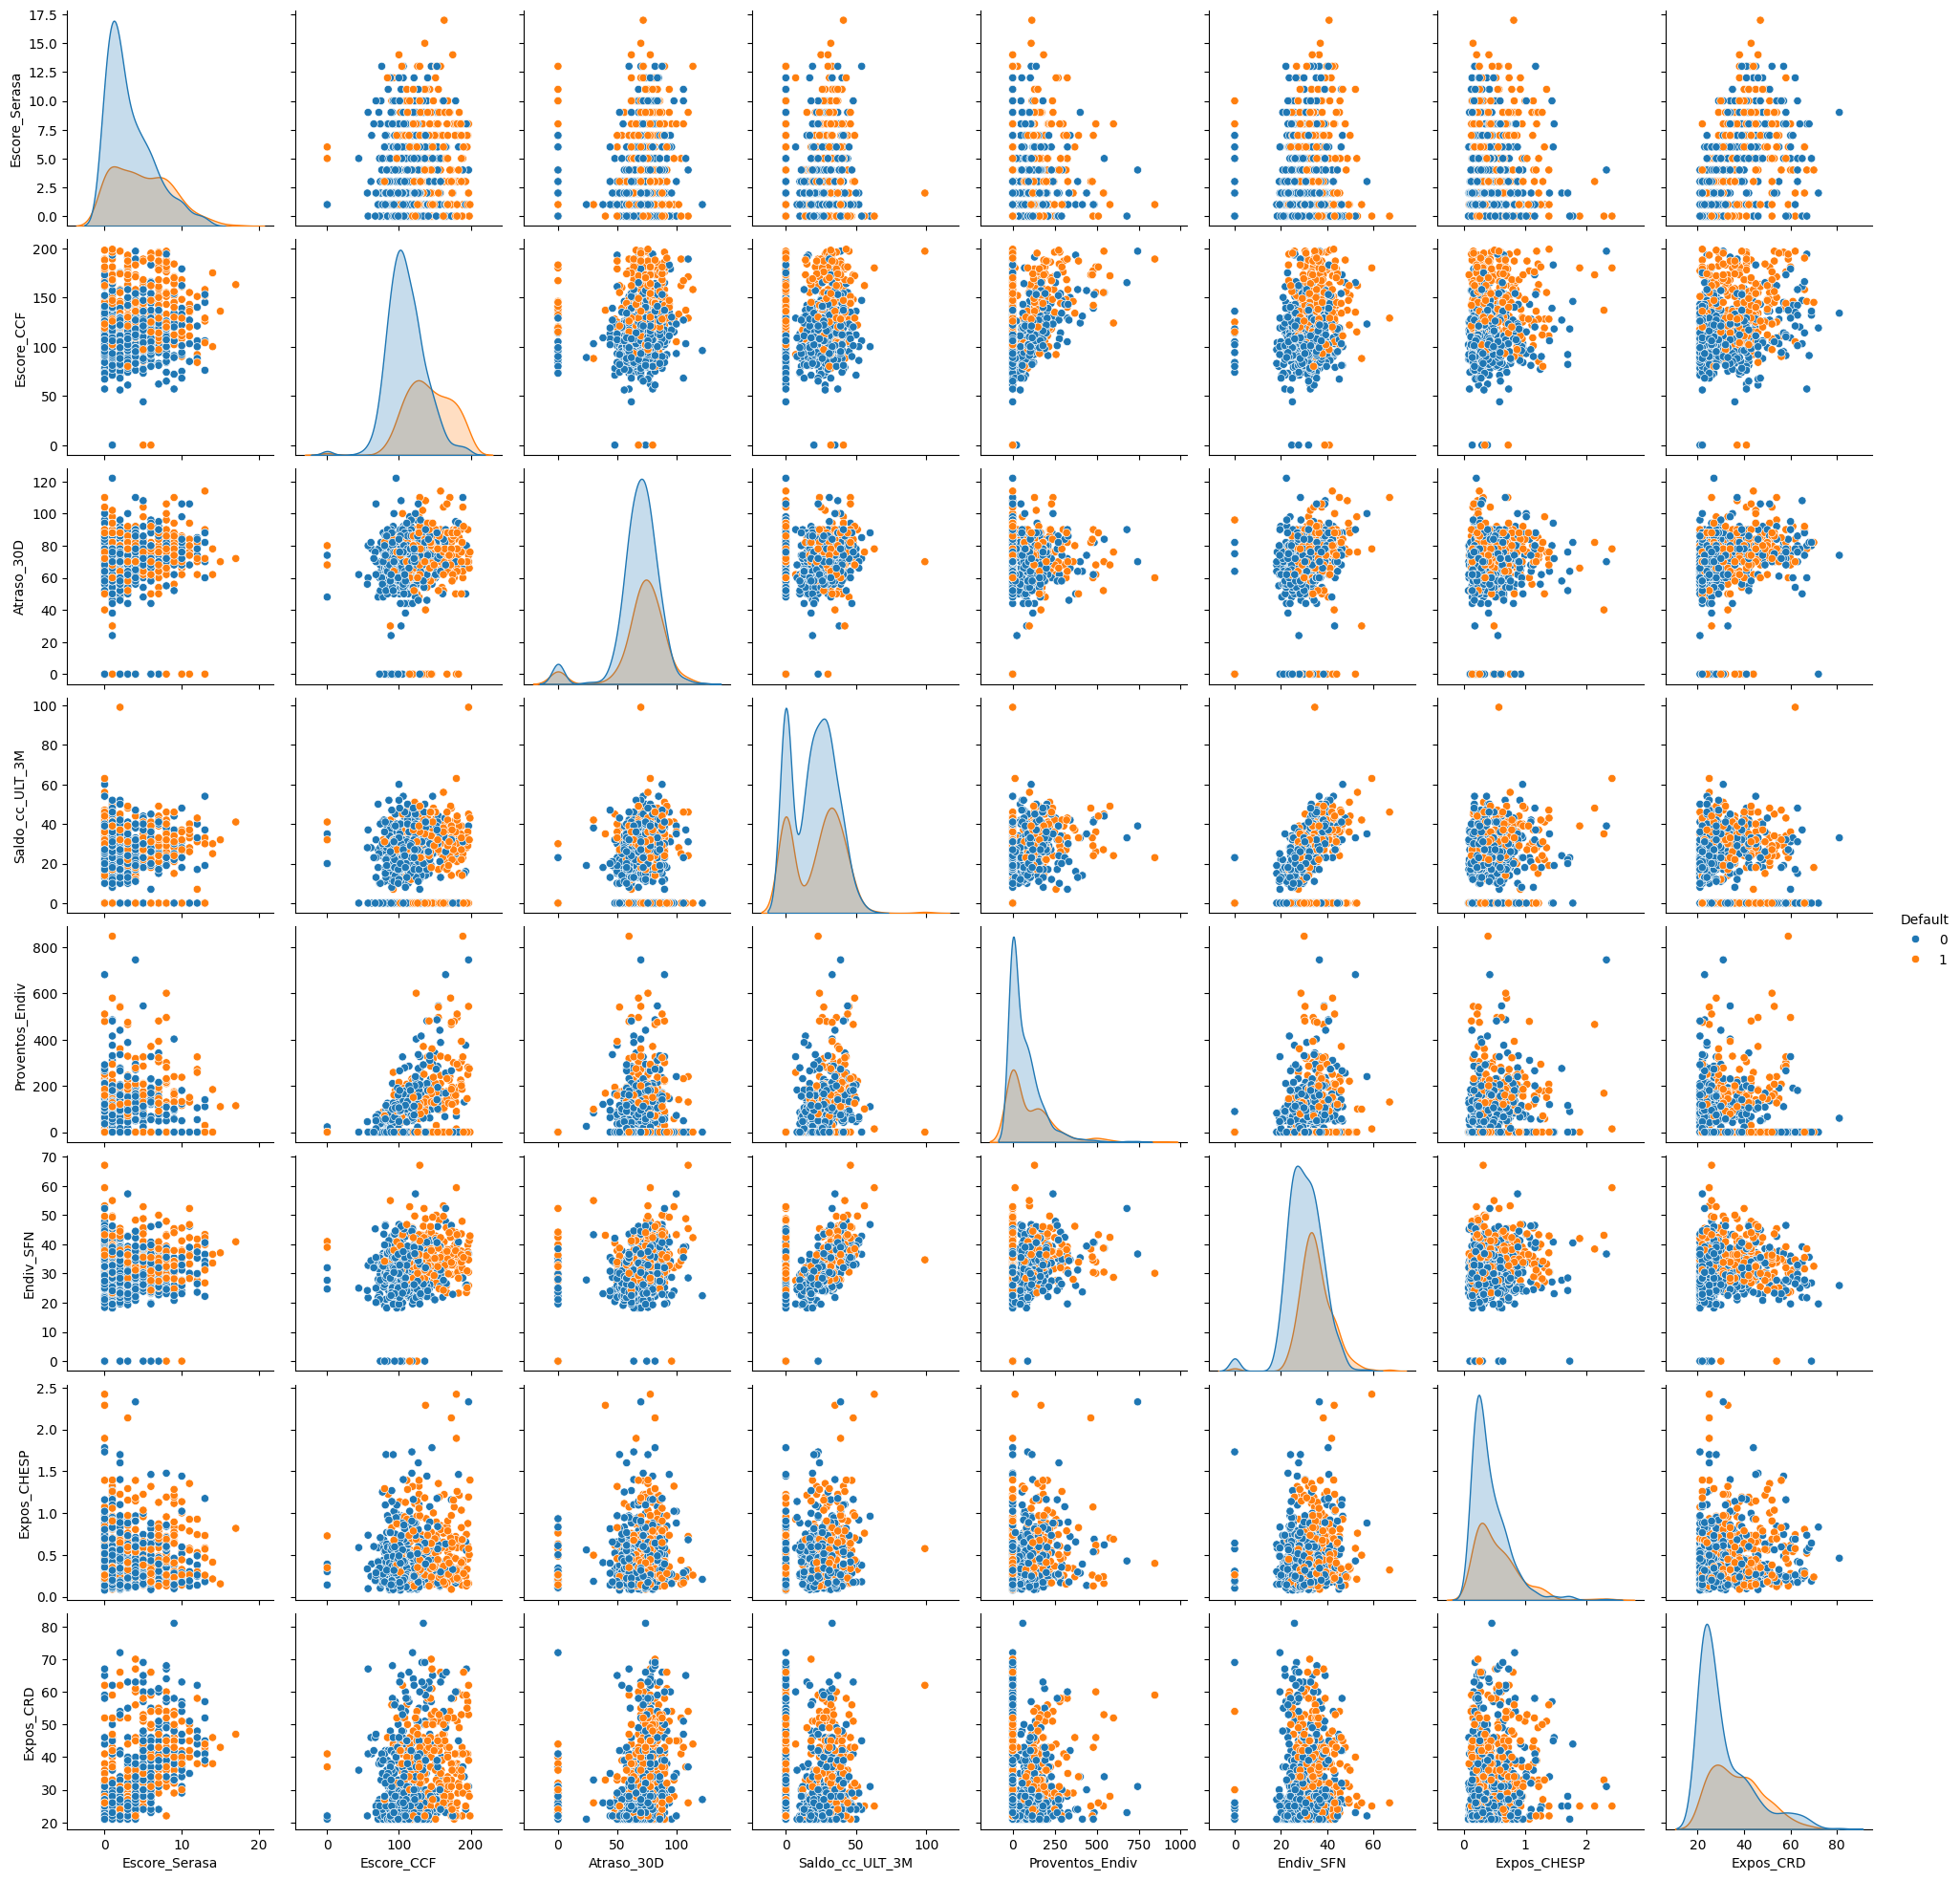

In [11]:
sns.pairplot(dados, hue='Default')

In [12]:
dados.describe()

,Escore_Serasa,Escore_CCF,Atraso_30D,Saldo_cc_ULT_3M,Proventos_Endiv,Endiv_SFN,Expos_CHESP,Expos_CRD,Default
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Amostragem do Dados

In [13]:
dados.columns

Index(['Escore_Serasa', 'Escore_CCF', 'Atraso_30D', 'Saldo_cc_ULT_3M',
       'Proventos_Endiv', 'Endiv_SFN', 'Expos_CHESP', 'Expos_CRD', 'Default'],
      dtype='object')

In [19]:
X_features = ['Escore_Serasa', 'Escore_CCF', 'Atraso_30D', 'Saldo_cc_ULT_3M', 
              'Proventos_Endiv', 'Endiv_SFN', 'Expos_CHESP', 'Expos_CRD']
X = dados[X_features]

y = dados['Default']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=0)

### Criando a Máquina Preditiva

In [25]:
modelo = LogisticRegression(solver='lbfgs')
modelo.fit(Xtrain, ytrain)

LogisticRegression()

In [23]:
acuracia = modelo.score(Xtest, ytest)
print("Acurácia dos dados : %.2f%%" % (acuracia * 100.0))

Acurácia dos dados : 77.92%


In [24]:
ypred = modelo.predict(Xtest)

### Avaliando a Máquina

In [26]:
print('Métricas de Classificação: \n', classification_report(ytest, ypred))

Métricas de Classificação: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



#### Confusion Matrix

In [28]:
print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))

Confusion Matrix: 
 [[141  16]
 [ 35  39]]


In [29]:
predicoes = pd.DataFrame({'Atual':ytest, 'Previsto':ypred})
predicoes.head()

,Atual,Previsto
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
